In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 뉴런부터 다층 퍼셉트론까지
#### 10.1.1 (TLU Network)
- 퍼셉트론은 가장 처음에 만든 인공 신경망 구조로, 숫자를 입력값으로서 주면 내부의 가중치와 곱한 뒤에 전부 합해서 '계단 함수'를 적용하여 결과값을 출력한다.

**구조**
- 하나의 퍼셉트론은 간단한 이중 선형 분류 문제에 사용이 될 수 있으며, 입력의 선형 조합을 계산해서 임계값을 넘으면 양성 클래스를 출력하게 된다.
  - 일반적으로 퍼셉트론은 이어진 층의 뉴런이 서로 모두 연결되어있는 'fully connected'구조이기 때문에 입력 뉴런 n개 + 편향 뉴런 1개가 입력층에 전달되고 출력함수고 출력 뉴런 (n+1)개가 주어진다.

**학습**
- 퍼셉트론은 한번에 주입되는 한개의 샘플에 대한 예측을 출력 뉴런마다 하는데, 이에 대한 실제 값과의 오차를 출여나가기 위해서 오차가 큰 뉴런에 더 큰 가중치를 부여한다.
  - **바뀐 가중치 = 현재 가중치 + 학습율 X (오차 X 입력값)**

- 이 퍼셉트론을 여러층을 쌓아서 만등 다층 퍼셉트론으로는 훨씬 더 복잡한 데이터를 학습할 수 있다.




#### 10.1.2 (다층 퍼셉트론)
- 다층 퍼셉트론은 input layer하나와 hidden layer이라고 불리는 하나 이상의 TLU Network, 그리고 마지막 out[ut layer으로 구성이 되어 있다.
- 출력층을 제외하고 모든 층은 편향 뉴런을 포함하며 다음 층과 완전히 연결이 되어있는 fully connected layer이다.

**이렇게 은닉층을 여러개 쌓아 올린 인공 신경망을 심층 신경망(DNN)이라고 한다.**

- 처음에는 신경망의 신호가 입력에서 출력으로 한 방향으로만 흘렀기 때문에 학습시키키가 어려웠다.
- 그러나 여기에서 오차 역전파라는 방법을 사용했더니 학습이 가능해졌다.


#### 10.1.3 (Back Propagation)
**개요**
- 이 알고리즘은 효율적으로 gradient값을 자동으로 계산하는 경사 하강법이다.
- 네트워크 구조를 정방향, 역방향으로 한번씩 통과하는 방법으로 모델의 모든 뉴런에 대한 오차의 gradient값의 계산이 가능하다.
  - 이 네트워크의 오차에 대한 gradient를 구하고 나면 평범한 경사 하강법을 수행하는데, 이는 오차가 0이 되는 시점에 멈추는 것이 가능하다.


  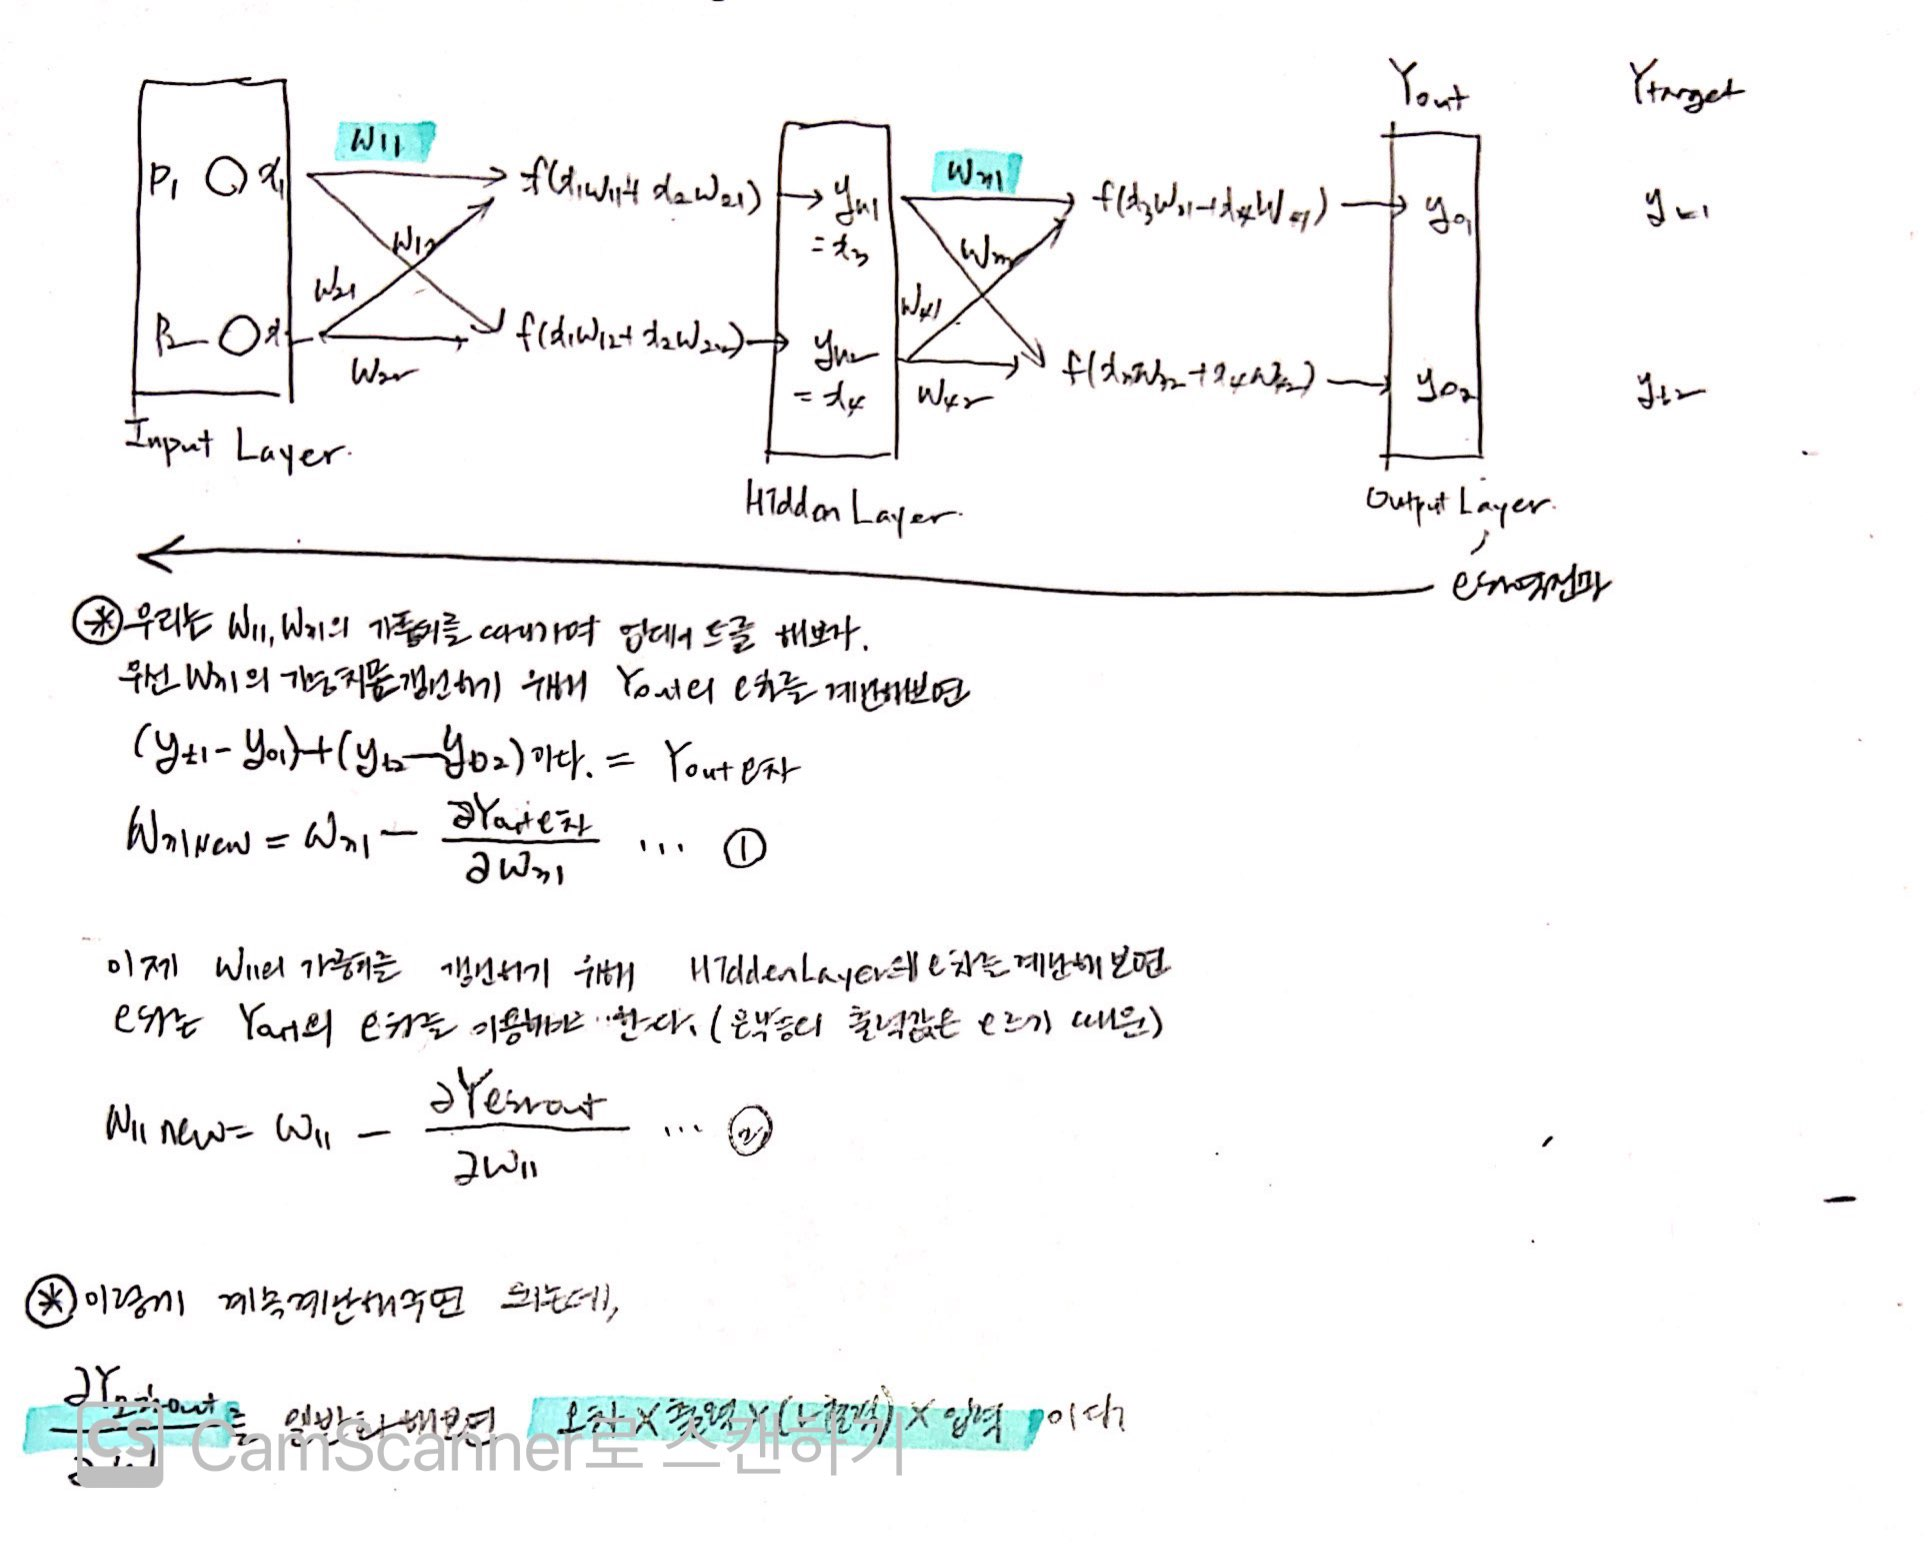

- 위와 같은 방법으로 오차 역전파가 진행이 된다.
- 간단하게 순서를 한번 더 정리해 보자면 
   1. 각 훈련 샘플에 대한 역전하 알고리즘이 먼저 예측을 만들고 오차를 계산한다.(정방향 계산)
   2. 각 층을 거치면서 이 연결이 오차에 기여한 정도를 계산한다.(역방향 계산)
   3. 오차가 감소하도록 가중치를 갱신한다.(경사 하강법)
- 은닉층의 가중치와 편향을 랜덤하게 초기화 하는것은 필수이다.

- 이 오차 역전파라는 개념의 탄생과 함꼐 새로운 활성화 함수도 탄생했는데, 이유는 비선형 활성화 함수여야만 미분하고 gradient값을 구할 떄에 층을 쌓는것이 의미가 있기 때문이다.
  - 계단 함수같은 선형 함수는 아무리 미분하고 층을 쌓아도 여전히 선형 구조이다.

#### 10.1.4 (회귀를 위한 다층 퍼셉트론)
- 다층 퍼셉트론을 회귀에 이용할 때에는 우리가 예측해야 하는 값의 개수만큼 다층 퍼셉트론의 출력 뉴런의 개수를 설정하게 된다.
- 회귀용 다츨 퍼셉트론을 만들 때에는 출력 뉴런에 활성화 함수를 굳이 사용하지 않고 어떤 특정 범위의 값을 출력하게 할 수도 있다.
  - 만약 양수를 출력하고 싶다면 ReLU, 또는 softplus를 이용할 수 있다.
  - logistic함수는 0과1사이를, tanh는 -1과 1사이의 값을 출력한다.

|하이퍼 파라미터|일반적 값|
|---:|---:|
입력뉴런의 수| 특성마다 하나씩
은닉층의 수| 문제마다 상이(1-5가 일반적)
은닉층의 뉴런수|문제마다 상이(1-100이 일반적)
출력 뉴런수|예측 차원마다 하나
은닉층의 activation function|ReLU, SELU
출력층의 activation function|없거나 출력값의 범위 제한이 필요하면 사용
손실 함수|MSE, MAE, Huber

#### 10.1.5 (분류를 위한 다층 퍼셉트론)
- 이진 분류 문제의 경우에는 logistic activation을 가진 출력 뉴런을 사용함으로서
- 다중 레이블 이진 분류(하나의 입력에 다중의 예측을, 각각 두 개의 클래스 존재)에는 logistic activation을 가진 다중의 출력 뉴런을 이용하면 된다.

- 만약 각 입력값이 3개 이상의 클래스 중에서 하나에만 속할 수 있다면 **클래스마다** 하나의 출력 뉴런이 필요하다. 이떄 출력 함수에는 softmax활성화 함수를 이용하여 모든 예측 확률을 더하면 1이 될 수 있도록 한다.
  - 확률 분포 예측을 해야 하기 때문에 손실 함수에는 cross-entropy를 이용해야 한다.

|하이퍼 파라미터|이진 분류|다중 레이블 분류|다중 분류|
|---:|:---:|:---:|:---:|
입력층과 은닉층|회귀와 동일|회귀와 동일|회귀와 동일
출력 뉴런 수|1|각 레이블마다 1|각 클래스마다 1|
출력층의 활성화 함수|logistix|logistic|softmax|
loss function|cross entropy|cross entropy|cross entropy|


### Keras 이용하기

- 제일 기본적으로 keras가 제공하는 데이터중에서 fashion mnist, callifornia housing을 이용해 보자

In [11]:
img = tf.keras.datasets.fashion_mnist

In [12]:
img = img.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
img

- 다운 받아진 이미지의 형태를 보면 array의 형태로 이미지 데이터와 label(y)데이터가 train, test로 나누어져 있음을 알 수 있다.
- 따라서 이를 따로 나누어서 저장을 해보면 된다.

In [21]:
img[1][1]

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [25]:
img[0][0].shape

(60000, 28, 28)

In [27]:
img[0][0].reshape(6000,784,-1)

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  3,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,  11, 142, 200],
        [106,   0,   0, ...,   0,  85, 185],
        [112,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   4,  53],
        [ 45,  53,  44, ...,  41,  62,  49],
        [ 60,  56,  67, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,  65],
        [ 99,   0,   0, ...,   0, 106,  60],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 163, 156,  32],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [34]:
train_x, train_y, test_x, test_y = img[0][0], img[0][1], img[1][0], img[1][1]

In [35]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

- 앞에 있는 수는 자료의 개수이다.

In [36]:
#이미 이미지 데이터의 크기가 28*28의 배열이기 떄문에, reshape는 필요가 없고, 경사 하강법으로 신경망을 훈련하기 때문에 입력 스케일의 크기의 조절은 필요하다.
#텍스트 정제뿐만 아니라 이미지의 정제도 중요하다.
#이를 위해 단순히 255.0으로 나누어 주면 된다.
train_x, test_x = train_x/255.0, test_x/255.0
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size= 0.2)

**1. Sequential API를 이용한 모델 만들기 - 분류**

In [45]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(units = 300, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))



1. 첫번째layer로 Flatten을 선택한 이유는 Dense layer에 넣기 위해서는 입력 이미지가 1D여야 하기 때문이다. Flatten layer에 넣으면 img.reshape(-1,1)를 한 것과 마찬가지이다.
2. Dense층마다 relu활성화 함수는 각각의 가중치 행렬을 관리하게 된다.

In [46]:
model.layers

In [47]:
model.layers[2]

In [49]:
weights, biases = model.layers[2].get_weights()
weights, biases

(array([[ 0.0060414 , -0.05423419, -0.11776759, ...,  0.09288029,
          0.03722312,  0.04274309],
        [-0.10549948, -0.00946594, -0.03007109, ..., -0.02911814,
         -0.06030283,  0.00019646],
        [-0.08009224, -0.11821762,  0.03798335, ..., -0.0032522 ,
          0.04637706,  0.00036751],
        ...,
        [ 0.0554333 ,  0.06776641, -0.03135481, ...,  0.0217213 ,
          0.00066702,  0.08135375],
        [-0.08444258,  0.07374006,  0.00885353, ..., -0.02715565,
         -0.11780689,  0.09381088],
        [ 0.00376385,  0.02186088,  0.00897763, ...,  0.06111004,
          0.08431404, -0.04730061]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

- Dense층은 연결 가중치를 무작위로 초기화하고 편향(bias)는 0으로 초기화한다. 
  - 만약에 초기화 수치라던가 값에 변형을 주고 싶다면 kernel_initializer이나 bias_initializer의 값을 알아서 설정해 주면 된다.

In [50]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
history = model.fit(train_x, train_y, validation_data = (val_x, val_y), epochs = 30, verbose = 0)

In [52]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.3359 - accuracy: 0.8790


[0.33592814207077026, 0.8790000081062317]

#### Accuracy = 87.90%

In [54]:
from keras.utils import to_categorical
new_y = to_categorical(train_y)

In [55]:
new_y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [60]:
re_y = np.argmax(new_y, axis = 1)
re_y

array([2, 1, 8, ..., 1, 6, 9])

- label이 정수로 이루어져있고 각 샘플마다 타깃 클래스 인덱스가 **하나씩** 있다. 클래스가 배타적이기 때문에 'sparse_categorical_crossentropy'를 이용하면 되고, 만약에 샘플마다 클래스병 타깃 확률을 가지고 있는 경우(예를 들면 원핫 벡터라면) 'categorical_crossentropy'를 이용하면 된다.

- 그리고 만약에 이진 분류를 수행한다면 sigmoid를 모델의 마지막 layer의 activation 함수로 이용하고 loss function으로는 'binary_crossentropy'를 사용한다.

  - sparse label -> one-hot label  
    :keras.utils.to_categorical()

  - sparse label <- one-hot label  
    :np.argmax(one_hot label, axis = 1)

- 훈련세트의 성능이 검증세트의 성능보다 월등히 높다면 과대적합의 가능성이 높다.

- 어떤 클래스는 많이 등장하고 어떤 클래스는 조금 등장하여 훈련 세트가 편중이 되어 있다면 fit()메서드를 호출할 때 class_weight 매개변수를 설정해야 한다. 그렇게 하면 **적게 등장하는 클래스는 높은 가중치를 부여**한다. 샘플별로 가중치를 부여하고 싶자면 sample_weight 매개변수를 설정하면 되는데, 둘다 설정이 되면 두 값을 곱해서 가중치에 적용한다.

**pandas dataframe으로 history에 저장된 값을 바꾸어주면 학습 과정을 쉽게 그릴 수있다.**  
- 마지막에 y의 범위를 ```plt.gca().set_ylim(0,1)```으로 바꾸는 것도 가능

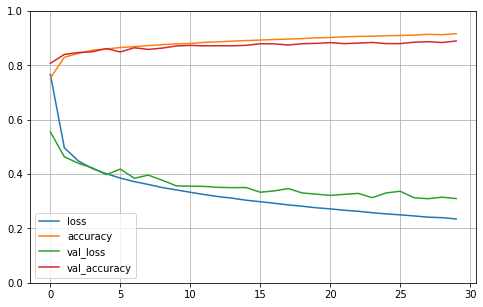

In [62]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

- 훈련 곡선을 볼 때에는 왼쪽으로 epoch의 절반만큼 이동해서 생각해야 한다.

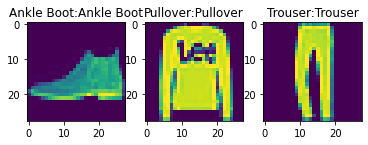

In [73]:
pred = model.predict_classes(test_x)
class_name = ['T-shirt/top', 'Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
real = test_y[:3]
pred = pred[:3]
fig = plt.figure()
for i in range(3):
  fig.add_subplot(1,3,i+1)
  plt.imshow(test_x[i]*255.0)
  plt.title('{}:{}'.format(np.array(class_name)[real[i]], np.array(class_name)[pred[i]]))

- 문자로 label의 이름이 저장이된 리스트인 class_name을 np.array로 바꿔준 뒤에 인덱스 array를 위의 코드처럼 인덱싱하면 그 값을 불러올 수 있다.

**2. Sequential API를 모델 만들기 - 회귀**

In [93]:
from sklearn.datasets import fetch_openml
credit = fetch_openml(name = 'credit-g')

In [116]:
data = credit.data
label = credit.target
credit.details['tag'][0]

'credit_scoring'

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [115]:
data[-1]

array([-0.45902624,  1.9992892 ,  1.34401408, -0.66640737,  0.46245715,
       -0.066488  , -1.97399698,  0.02414692,  0.44932648, -0.30368573,
        1.04698668,  0.61161278, -0.75164167,  0.46083068,  0.13371046,
       -0.704926  ,  0.14694918, -0.42828957, -0.82331789, -0.19601428])

In [118]:
dataset = pd.read_csv('/content/sample_data/dataset_31_credit-g.csv')

In [119]:
dataset.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [120]:
sati = pd.read_csv('/content/sample_data/dataset_186_satimage (1).csv')

In [139]:
imgmake = sati.columns[:-1]
len(sati.values)

6430

In [148]:
file = []
for i in range(len(sati)):
  file.append(sati.values[i][:-1])

In [149]:
file = np.array(file).reshape(6430,4,9)

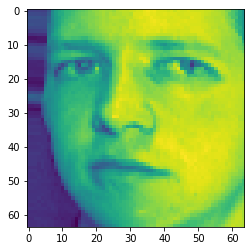

In [89]:
|data = data.reshape(400,64,64)*255.0
plt.imshow(data[3])

In [86]:
label = fetch_olivetti_faces().target
label.shape

(400,)

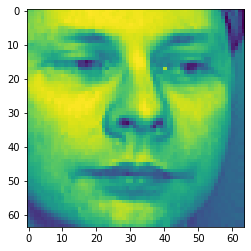

In [87]:
plt.imshow(data[34])

In [165]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
x_train, x_test, y_train, y_test = train_test_split(housing.data, housing.target)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train)

In [166]:
x_train

array([[  15.0001    ,   42.        ,    8.5625    , ...,    2.82142857,
          34.05      , -118.49      ],
       [   4.7543    ,   27.        ,    5.3568    , ...,    2.472     ,
          33.87      , -118.31      ],
       [   3.3333    ,   49.        ,    5.43644068, ...,    2.44067797,
          37.9       , -122.29      ],
       ...,
       [   3.9722    ,   52.        ,    4.7160804 , ...,    1.78894472,
          37.76      , -122.39      ],
       [   2.9417    ,   39.        ,    4.08178439, ...,    2.16542751,
          34.1       , -118.29      ],
       [   2.0724    ,   35.        ,    4.49491525, ...,    3.46779661,
          37.96      , -122.35      ]])

In [168]:
len(y_train)

11610

In [169]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

- standard scaler은 평균이 0과 표준편차가 1이 되도록 값을 바꾸는데, 여기서```fit_transform```을 하면 해당 데이터를 저장을 해 그 값의 평균과 표준편차를 이용하기 때문에 학습 데이터만 fit_transform()을 적용하고 나머지는 그냥 transform()을 적용한다.

In [172]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(50, activation = 'relu', input_shape = x_train.shape[1:]))
model.add(tf.keras.layers.Dense(25, activation = 'relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = ['accuracy'])
model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50,verbose = 0)

In [173]:
model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 777us/step - loss: 0.3351 - accuracy: 0.0029


[0.33512550592422485, 0.0029069767333567142]

**3. 함수형 API이용하여 모델 만들기**

In [175]:
input_ = tf.keras.layers.Input(shape = x_train.shape[1:])
hidden1 = tf.keras.layers.Dense(30, activation = 'relu')(input_)
hidden2 = tf.keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = tf.keras.layers.Concatenate()([input_, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs = [input_], outputs = [output])

In [176]:
model.compile(loss = 'mse', optimizer = 'sgd', metrics = ['accuracy'])
model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 30)

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 0.9086 - accuracy: 0.0031 - val_loss: 3.3013 - val_accuracy: 0.0023
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 4.3428 - accuracy: 0.0032 - val_loss: 59.4088 - val_accuracy: 0.0021
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: nan - accuracy: 4.3066e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000

In [178]:
model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 736us/step - loss: nan - accuracy: 0.0000e+00


[nan, 0.0]

위와 같은 모델은   

**입력 -> 은닉2 -> 층연결 -> 출력층**  
의 형태인데 이는 싱경망이 깊게 쌓은 층을 이용한 복잡한 패턴과 짧은 경로를 이용한 간단한 규칙을 모두 학습할 수 있도록 하기 위해서 사용이 된다.

1. shape와 dtype를 포함하여서 모델의 입력을 정의하는데, 하나의 모델은 여러개의 입력을 받을 수 있다.
2. 30개의 뉴런과 한개의 relu 활성화 함수를 가지는 dense층을 만든다. 
3. 두번째 은닉층을 만들고 함수처럼 호출하는데, 첫번째 층의 출력을 전달한다.
4. Concancate층을 만들어서 입력의 입력값과 두번째 은닉층을 연결한다.
5. 하나의 뉴런이 있고 활성화 함수가 없는 출력층을 만들어서 Concanate 층이만든 결과를 사용해서 호출한다. 
6. 마지막으로 사용할 입력과 출력을 지정하여 keras model을 만든다.  
  
- 이 방법은 주로 입력값에 따라 다른 경로의 모델을 이용해서 학습싴키고자 하는 경우, 혹은 여러개의 출력이 필요한 경우에 사용하게 된다.
  - 예를 들면 스림에 있는 주요 물체를 분류하고 위치를 알아야 하는 경우에 회귀 작업(물체 중심의 좌표, 너비, 높이를 찾음)과 분류 작업을 같이 한다.
  - 동일한 입력에 대해서 다양한 결과를 얻어야 하는 경우  


In [ ]:
#여러개의 출력이 필요한 경우
output = keras.layers.Dense(1, name = 'main_output')(concat)
other_out = keras.layers.Dense(1, name = 'other_output')(hidden2)
new_model = tf.keras.Model(inputs = [input_A, input_b], outputs = [output, other_out])

new_model.compile(loss = ['mse','mse'], loss_weights = [0.9,0.1], optimizer = 'sgd')
hist = new_model.fit([x_train_A, x_train_B], [y_train_A,y_train_B], epochs = 30, validation_data = [x_val_A, x_val_B], [y_val_A, y_val_B])

#### 10.2.1 Callback 사용하기

In [185]:
#훈련하는 동안 검증세트를 사용할 때에 사용 가능
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(model, save_best_only = True)
#학습 중 조기종료를 위해
early_stop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights=True)
#사용자 정의 함수 이용하기
def new_callback(epoch, logs):
  print('{}'.format(logs['val_loss']/logs['loss']))
new_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=new_callback)
model.fit(x_train, y_train, epochs = 50, validation_data = (x_val, y_val), callbacks = [new_callback])

Epoch 1/50
363/363 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/50
363/363 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/50
363/363 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/50
363/363 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/50
363/363 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/50
363/363 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/50
363/363 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0

#### 10.3 신경망 하이퍼파라미터 튜닝하기
1. 간단하던 복잡하던 튜닝해야할 값은 너무 많다.
2. 층의 개수, 층마다 있는 뉴런의 개수, 각 층에서 사용할 활성화 함수, 가중치 초기화 전략 등 다뤄야 할 변수가 많기 때문이다.

**방법**  
1. k-fold교차 검증 진행
2. GridSearchCV, RandomizedSearchCV
  - 이를 이용하려면 keras모델을 sklearn 추정기처럼 보이게 해야 한다.(왜냐하면 이 검증기를 이용할때 sklearn에 정의된 함수를 이용했음)
  - keras wrapper에는 KerasClassifier, KerasRegressor 전부 있기 때문에 분류와 회귀 모두에 사용이 가능하다.

In [189]:
def build_model(n_hidden = 1, n_neurons = 30, learning_Rate = 3e-3, input_shape = [8]):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.InputLayer(input_shape = input_shape))
  for layer in range(n_hidden):
    model.add(tf,keras,layers,Dense(n_neurons, activation = 'relu'))
  model.add(tf.keras.layers.Dense(1))
  optimizer = tf.kera.soptimizers.SGD(lr = learning_rate)
  model.compile(loss = 'mse', optimizer = optimizer)
  return model
keras_reg = tf.keras.wrappers.scikit_learn.KerasRegressor(build_model)
#KerasRegressor은 build_model()로 만들어진 케라스 모델을 감싸는 간단한 wrapper이다. 이제 일반적인 sklearn의 회귀 추정기처럼 이 객체가 사용이 가능하다.
#따라서 이제 sklearn추정기를 불러와서 param_disturbs를 정의 해 준 다음에 추정기에 맞추어서 fitting작업을 진행하면 최적의 hyperparameter을 지정해 준다.